<a href="https://colab.research.google.com/github/vijya2004/real-time-object-detection/blob/main/yolov8_real_time.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install ultralytics
!pip install opencv-python-headless


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 901.7/901.7 kB 16.0 MB/s eta 0:00:00


In [2]:
from ultralytics import YOLO
import cv2
from google.colab.patches import cv2_imshow

# Load YOLOv8 pre-trained model
model = YOLO('yolov8n.pt')  # Use 'yolov8s.pt', 'yolov8m.pt', etc., for larger models


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 6.25M/6.25M [00:00<00:00, 79.3MB/s]


In [7]:
from google.colab import output
from IPython.display import display, Javascript
from ipywidgets import widgets
import base64
from io import BytesIO
from PIL import Image

# Create a button to capture an image
button = widgets.Button(description="Capture Image")
display(button)

# Define a callback for button click
def capture_image(b):
    display(Javascript('''
        (async () => {
          const video = document.createElement('video');
          const canvas = document.createElement('canvas');
          const ctx = canvas.getContext('2d');
          const stream = await navigator.mediaDevices.getUserMedia({ video: true });
          video.srcObject = stream;
          await video.play();

          // Capture frame
          ctx.drawImage(video, 0, 0, canvas.width, canvas.height);
          const dataURL = canvas.toDataURL('image/png');
          google.colab.kernel.invokeFunction('notebook.save_image', [dataURL], {});
          video.pause();
          video.srcObject = null;
          stream.getTracks()[0].stop();
        })();
    '''))

button.on_click(capture_image)

# Save the captured image
def save_image(dataURL):
    header, encoded = dataURL.split(",", 1)
    image_data = base64.b64decode(encoded)
    with open("captured_image.jpg", "wb") as f:
        f.write(image_data)

output.register_callback('notebook.save_image', save_image)


Button(description='Capture Image', style=ButtonStyle())

<IPython.core.display.Javascript object>


0: 320x640 1 person, 43.1ms
Speed: 3.0ms preprocess, 43.1ms inference, 1.8ms postprocess per image at shape (1, 3, 320, 640)


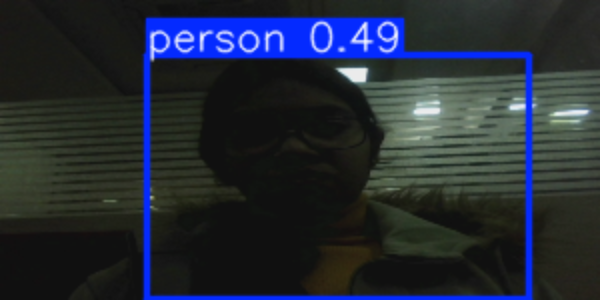

In [8]:
import cv2

# Load the captured image
image_path = "captured_image.jpg"
image = cv2.imread(image_path)

# Perform detection
results = model(image)

# Visualize results
annotated_image = results[0].plot()  # Annotated image with detections

# Resize the image (e.g., increase the size by a factor of 2)
scaled_annotated_image = cv2.resize(annotated_image, (annotated_image.shape[1] * 2, annotated_image.shape[0] * 2))

# Display the resized image
cv2_imshow(scaled_annotated_image)


In [5]:
cv2.imwrite("annotated_image.jpg", annotated_image)


True

In [6]:
import cv2

# Initialize camera
cap = cv2.VideoCapture(0)  # 0 for default webcam

while True:
    ret, frame = cap.read()
    if not ret:
        break

    # Perform detection
    results = model(frame)

    # Display the annotated frame
    annotated_frame = results[0].plot()
    cv2.imshow("YOLOv8 Detection", annotated_frame)

    # Press 'q' to quit
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()
